Example of Euler's method
---
<div>
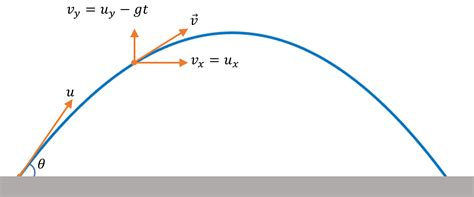
</div>

This example supersedes the starter code described in the README.md file 

In [1]:
vinit = 10 # m/s
theta0 = 45 # degrees
dt = 0.01 # seconds

In [2]:
print("Simulating projectile motion with params:")
print("(vinit,theta0,dt)=(%7.2lf,%7.2f,%7.2f)" % (vinit,theta0,dt))

Simulating projectile motion with params:
(vinit,theta0,dt)=(  10.00,  45.00,   0.01)


In [3]:
from matplotlib import pyplot as plt
from math import sin,cos,pi
import numpy as np

In [4]:
# initial coordinate values: position and velocity 
#  x y          vx                         vy
y0=[0.,0.,vinit*cos(theta0*pi/180),vinit*sin(theta0*pi/180)]
# acceleration due to gravity
g=9.81  # m/s^2

In [5]:
# the functions = derivatives of the coortinates wrt t
def f0(t,y):
    return y[2]  # v_x
def f1(t,y):
    return y[3]  # v_y
def f2(t,y):
    return 0     # acceleration in x
def f3(t,y):
    return -g    # acceleration in y

In [6]:
t=[0]   # keep track of steps in time
y=y0[:] # copy the starting coordinates
trajectory=np.asarray([y0]) # store trajectory

In [7]:
# propagate our projectile
while y[1]>=0:
    y[0]= y[0]+f0(t[-1],y)*dt
    y[1]= y[1]+f1(t[-1],y)*dt
    y[2]= y[2]+f2(t[-1],y)*dt
    y[3]= y[3]+f3(t[-1],y)*dt
    t.append(t[-1]+dt)
    trajectory=np.append(trajectory,[y],axis=0)

In [8]:
# get trajectories for each coordinate
sx = trajectory[:,0] 
sy = trajectory[:,1]
vx = trajectory[:,2]
vy = trajectory[:,3]

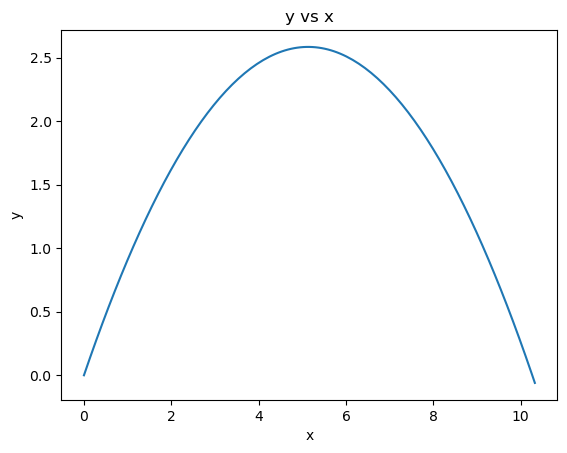

In [9]:
plt.plot(sx, sy)
plt.title("y vs x"),plt.xlabel("x"),plt.ylabel("y");

Study and assess the performance of the Euler algorithm, you can do this in a variety of ways, for example:

* Observe the calculated landing location versus the time step (similarly the error wrt the analytic solution).
* Can you find a time step where the landing location is a “pretty good” match to the expected position?
* Is this observation stable with changes to the initial conditions?
* Plot the difference in x and y position (or velocity) versus time compared to the analytic solution
* Plot the energy of the projectile versus time
* …


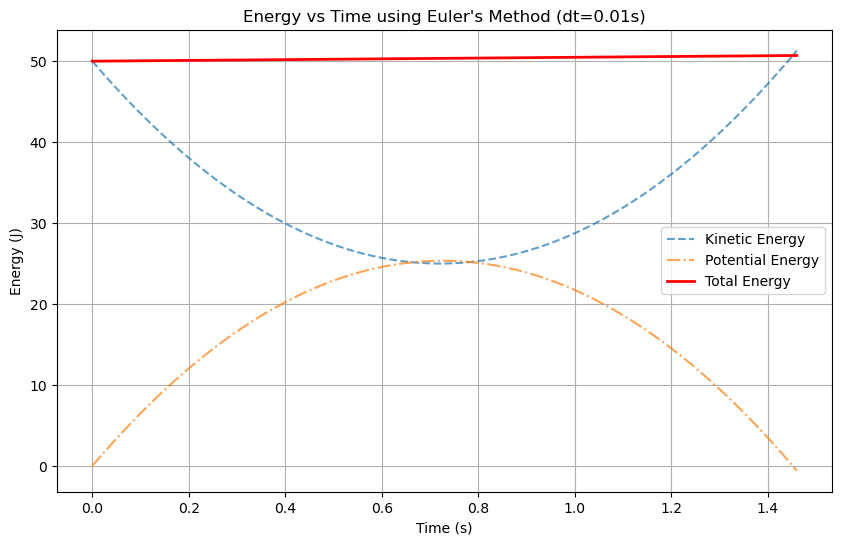

In [10]:
m = 1.0 


ke = 0.5 * m * (vx**2 + vy**2)

pe = m * g * sy

energy = ke + pe

plt.figure(figsize=(10, 6))
plt.plot(t, ke, label='Kinetic Energy', linestyle='--', alpha=0.7)
plt.plot(t, pe, label='Potential Energy', linestyle='-.', alpha=0.7)
plt.plot(t, energy, label='Total Energy', linewidth=2, color='red')

plt.title(f"Energy vs Time using Euler's Method (dt={dt}s)")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.legend()
plt.grid(True)

plt.show()